In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interactive_output

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('turma_matricula_docente_filtrados.csv')

In [4]:
# Widgets
unidade_dropdown = widgets.Dropdown(
    options=df[['unidade_responsavel', 'unidade_responsavel']].drop_duplicates().values.tolist(),
    description='Curso:',
    value=None
)

componente_dropdown = widgets.Dropdown(
    description='Componente Curricular:',
    value=None
)

docente_dropdown = widgets.Dropdown(
    description='Docente:',
    value=None
)

In [5]:
def update_dropdowns(*args):
    df_unidade = df[df['unidade_responsavel'] == unidade_dropdown.value]
    
    componente_dropdown.options = df_unidade[['nome_x', 'id_componente']].drop_duplicates().values.tolist()
    
    df_componente = df_unidade[df_unidade['id_componente'] == componente_dropdown.value]
    docente_dropdown.options = df_componente[['nome_y', 'siape']].drop_duplicates().values.tolist()


In [6]:
def plot_chart(unidade, componente, docente):
    if unidade and componente and docente:
        df_filtrado = df[(df['unidade_responsavel'] == unidade) & 
                         (df['id_componente'] == componente) &
                         (df['siape'] == docente)]
        
        data = df_filtrado.drop_duplicates(subset='discente')

        contagem_descricao = data['descricao'].value_counts()
        porcentagens = (contagem_descricao / contagem_descricao.sum()) * 100
    
        ax.clear() # Limpa o conteúdo atual do eixo
        wedges, texts, autotexts = ax.pie(porcentagens, labels=porcentagens.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
        ax.axis('equal')
        for text, autotext in zip(texts, autotexts):
            text.set(size=10)
            autotext.set(size=10)
        legend_labels = [f"{label}: {value}" for label, value in zip(contagem_descricao.index, contagem_descricao.values)]
        ax.legend(wedges, legend_labels, title="Descrições", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        fig.canvas.draw() # Atualiza o gráfico

In [7]:
def update_chart(change):
    with open('test.txt', 'w') as f:
        f.write('hue')
    unidade = unidade_dropdown.value
    componente = componente_dropdown.value
    docente = change.new

    clear_output(wait=True)  # Limpa a saída anterior
    display(unidade_dropdown, componente_dropdown, docente_dropdown)  # Exibe os widgets novamente

    plot_chart(unidade, componente, docente)

In [8]:
unidade_dropdown.observe(update_dropdowns, 'value')
componente_dropdown.observe(update_dropdowns, 'value')
docente_dropdown.observe(update_chart, 'value')

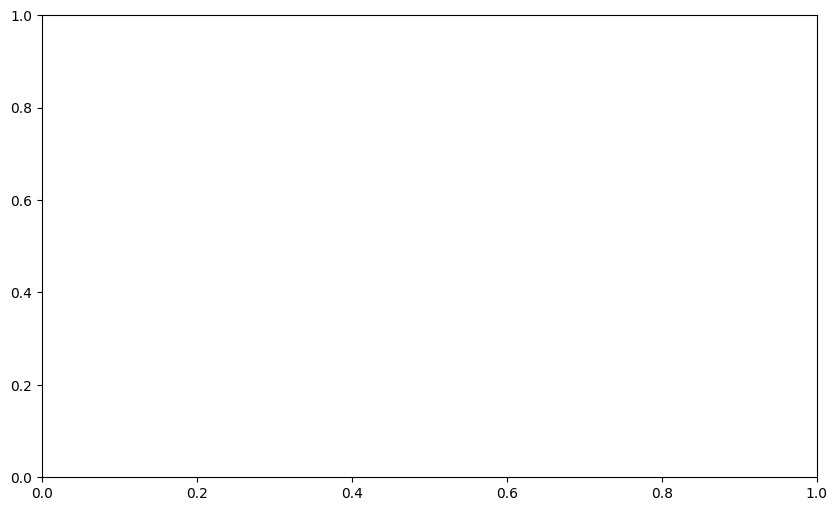

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.show()

In [10]:
display(unidade_dropdown, componente_dropdown, docente_dropdown)

Dropdown(description='Curso:', options=(['DEPARTAMENTO DE ARQUITETURA', 'DEPARTAMENTO DE ARQUITETURA'], ['PROG…

Dropdown(description='Componente Curricular:', options=(), value=None)

Dropdown(description='Docente:', options=(), value=None)